## 비지도학습 - KMeans 군집화
- 가장 많이 사용함
- 랜덤하게 찍은 centroid라는 중심점을 기준으로 가장 가까운 포인트들을 선택하는 군집화 기법
  - 유클리드언 디스턴스를 활용
- 사용되는 예제
  - 스팸 문자 분류
  - 뉴스 기사 분류
  - 참고 : https://speedanddirection.tistory.com/84

### KMeans Clustering
- 주어진 데이터를 k개의 클러스터로 묶는 방식
- 거리 차이의 분산을 최소화하는 방식으로 동작

In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


#### 데이터 준비

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# KMeands 라이브러리 임폴트
from sklearn.cluster import KMeans

In [10]:
# iris 데이터셋 로드
iris = load_iris()

In [11]:
X = iris['data']
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['target'] = iris.target

In [14]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[Clustering 전 Scalinng]
- clustering은 Distance를 구하는 작업이 필요함
- Feature들의 Scale이 다르면 Distance를 구하는데 가중치가 들어가게 됨
- 따라서, Distance기반의 Clustering의 경우 Scaling이 필요임

In [15]:
# MinMaxScaler 데이터 normalization 적용
scaled_X = MinMaxScaler().fit_transform(df_iris.iloc[:, :4])
scaled_X[:3]

X_scal = pd.DataFrame(scaled_X, columns=feature_names)
X_scal.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


[차원축소]
- Clustering의 결과를 확인하기 위하여 차원 축소 진행

In [17]:
# 2개의 feature로 차원 축소
pca = PCA(n_components=2).fit(X)
X_PCA = pca.transform(X)
X_EMM = pd.DataFrame(X_PCA, columns=['AXIS1', 'AXIS2'])
print("PCA Variance : {}".format(pca.explained_variance_ratio_))
X_EMM.head(3)

PCA Variance : [0.92461872 0.05306648]


,AXIS1,AXIS2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949


### KMeans 군집화 주요 파라미터
- n_clusters  분할 갯수 지정
- n_init
    - K-means는 step2에서 초기 중심점 설정이라는 작업을 하는데 초기중심점 셋팅하는 것에 따라 군집의 Quality가 달라짐
    - 따라서 여러번 시도해 보는 것이 필요함
    - default : 10
- max_iter : 몇번 round를 진행할 것인지
    - round
        - 중심정 재 설정
        - 데이터를 군집에 재할당
    - 이러한 round를 최대 몇번까지 돌것인가?
    - default = 300
        - 300번 안에 중심점 움직임이 멈추지 않으면 그냥 stop

### KMeans 객체 생성

In [33]:
# 3개의 군집으로 분류
kmeans = KMeans(n_clusters=3)

### X 데이터 학습

In [34]:
kmeans.fit(X_scal)

KMeans(n_clusters=3)

In [22]:
kmeans.transform(X_scal)[:3]

array([[1.18771727, 0.04538259, 0.81511483],
       [1.19937259, 0.18206466, 0.77646357],
       [1.23608312, 0.13180016, 0.82410943]])

### 분류한 결과 확인

In [25]:
# X_scal 데이터를 넣어 예측을 해보면
kms_label = kmeans.predict(X_scal)

In [26]:
# kmeans.labels_ : 모델.labels_ 변수에 분류 결과 저장되어 있음
kms_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [29]:
# 위의 코드와 같음
# kmaens가 학습한 군집된 결과를 가지고 있음
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [27]:
# 실제값
df_iris['target'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<Axes: ylabel='count'>

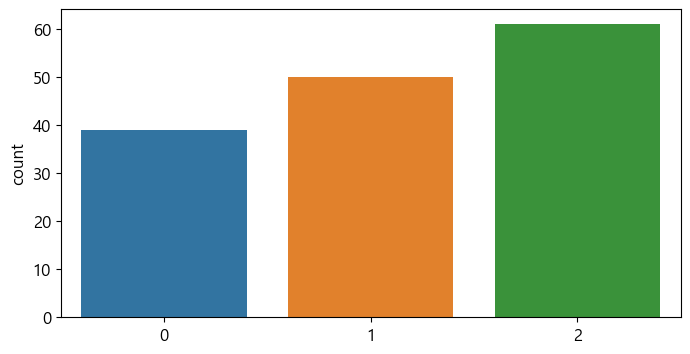

In [30]:
# 군집분류한 결과 확인
sns.countplot(x = kmeans.labels_)

<Axes: xlabel='target', ylabel='count'>

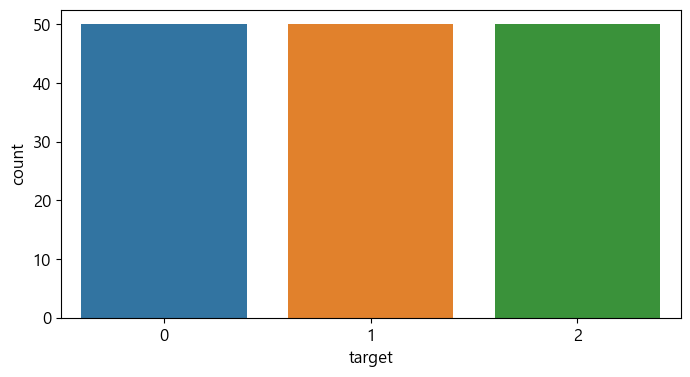

In [31]:
# 원래 정답
sns.countplot(x = df_iris['target'])

In [32]:
kmeans

KMeans(n_clusters=3)

<Axes: ylabel='count'>

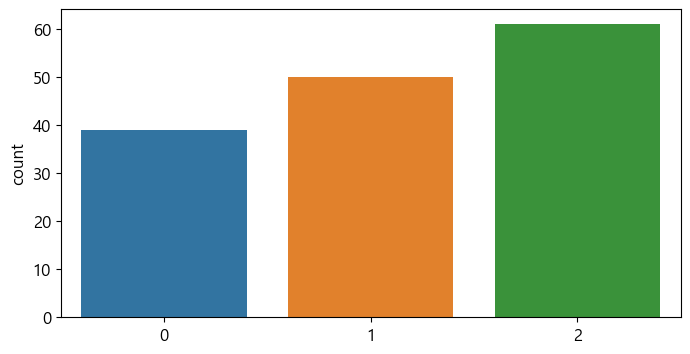

In [37]:
# max_iter=300 (default)
kmeans = KMeans(n_clusters=3, max_iter=500)
kms_labels2 = kmeans.fit(X_scal)
kmeans.predict(X_scal)
sns.countplot(x = kmeans.labels_)

In [20]:
kmeans

KMeans(max_iter=500, n_clusters=3)

### n_cluster3 시각화

In [21]:
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 산점도로 결과 그려보기

In [40]:
# X_scal 데이터에 대해서, K = 3로 클러스터링 수행

Cluster = KMeans(n_clusters=3).fit(X_scal)
Cluster

KMeans(n_clusters=3)

In [42]:
# label Add to DataFrame
df_iris['3_label'] = Cluster.labels_
df_iris['3_label']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: 3_label, Length: 150, dtype: int32

In [43]:
# dataframe을 따로 만듬
labels = pd.DataFrame(Cluster.labels_, columns=['labels'])
labels

,labels
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,0
147,2
148,2


In [44]:
# plot Data Setting
plot_data = pd.concat([X_EMM, labels], axis=1)
groups = plot_data.groupby('labels')
# for j, (name, group) in enumerate(groups):
#     print(j, (name, group))

Text(0.5, 0, 'AXIS1')

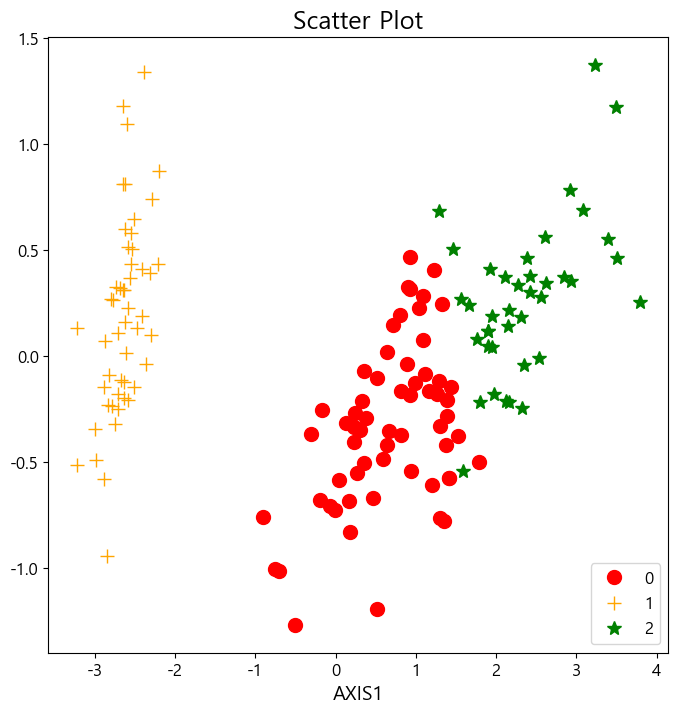

In [45]:
mar = ['o', '+', '*', 'D', ',', 'h', '1', '2', '3', '4', 's', '<', '>']
colo = ['red', 'orange', 'green', 'blue', 'cyan', 'magenta', 'black', 'yello', 'grey', 'orchid', 'lightpink']
fig, ax = plt.subplots(figsize=(8, 8))
for j, (name, group) in enumerate(groups):
    ax.plot(group['AXIS1'],
            group['AXIS2'],
            marker=mar[j],
            linestyle='',
            label=name,
            c=colo[j],
            ms=10)
    ax.legend(fontsize=12, loc='lower right')
plt.title('Scatter Plot', fontsize=18)
plt.xlabel('AXIS1', fontsize=14)   

### K =[2, 3, 4, 5] 차례대로 군집분류 시각화

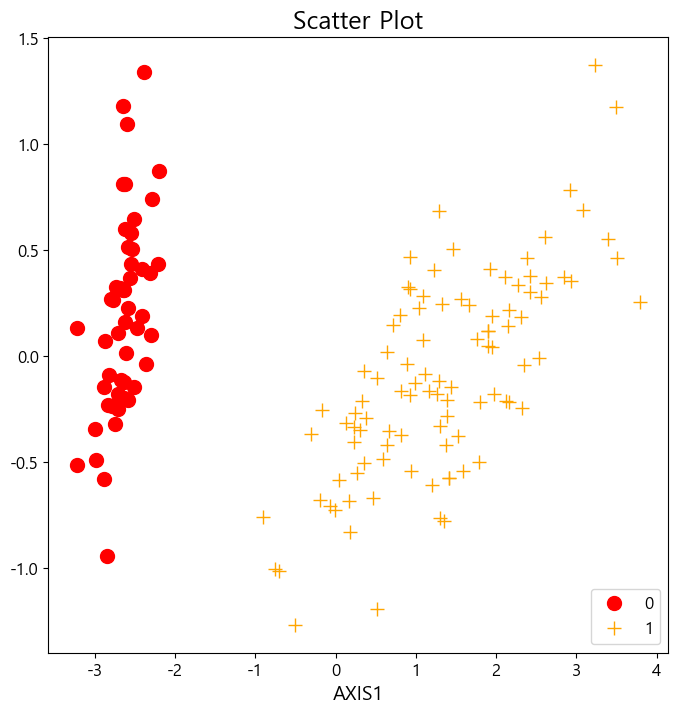

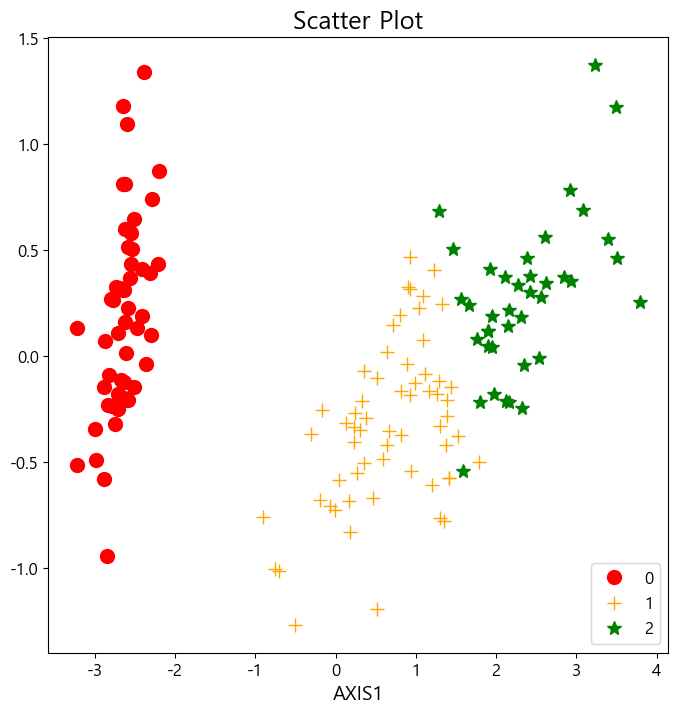

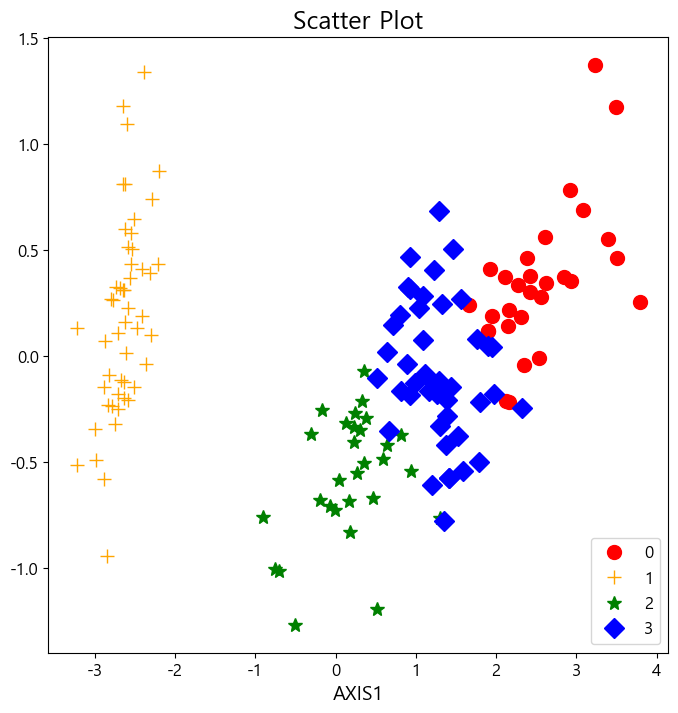

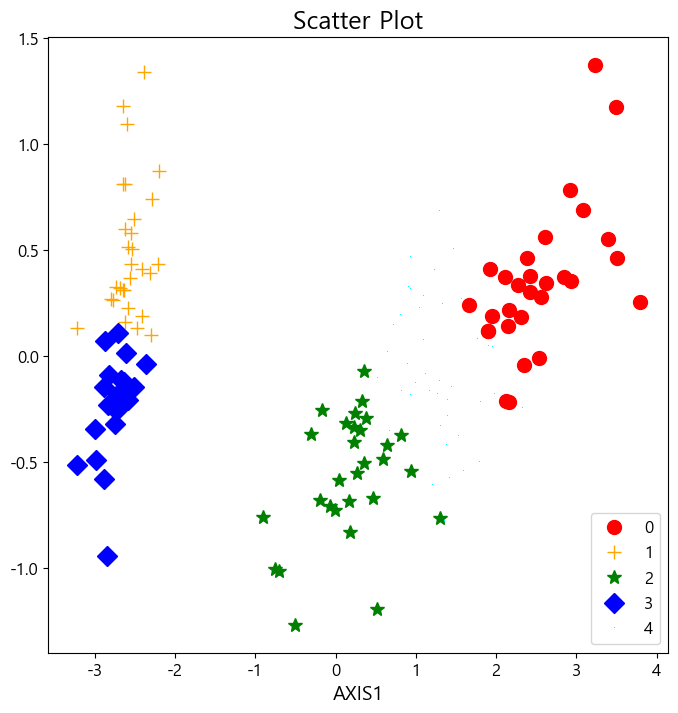

In [47]:
# K-means Modeling
# K =[2, 3, 4, 5] 로 군집을 했을 때 for문 예제
for cluster in list(range(2,6)):
    # print(cluster)
    Cluster = KMeans(n_clusters=cluster).fit(X_scal)
    
    # label Add to DataFrame
    df_iris['{} label'.format(cluster)] = Cluster.labels_
    labels = pd.DataFrame(Cluster.labels_, columns=['labels'])
    

    # plot Data Setting
    plot_data = pd.concat([X_EMM, labels], axis=1)
    groups = plot_data.groupby('labels')

    mar = ['o', '+', '*', 'D', ',', 'h', '1', '2', '3', '4', 's', '<', '>']
    colo = ['red', 'orange', 'green', 'blue', 'cyan', 'magenta', 'black', 'yello', 'grey', 'orchid', 'lightpink']
    fig, ax = plt.subplots(figsize=(8, 8))
    for j, (name, group) in enumerate(groups):
        ax.plot(group['AXIS1'],
                group['AXIS2'],
                marker=mar[j],
                linestyle='',
                label=name,
                c=colo[j],
                ms=10)
        ax.legend(fontsize=12, loc='lower right')
    plt.title('Scatter Plot', fontsize=18)
    plt.xlabel('AXIS1', fontsize=14)        

In [24]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,3_label,2 label,3 label,4 label,5 label
0,5.1,3.5,1.4,0.2,0,1,1,0,0,4
1,4.9,3.0,1.4,0.2,0,1,1,0,0,0
2,4.7,3.2,1.3,0.2,0,1,1,0,0,0
3,4.6,3.1,1.5,0.2,0,1,1,0,0,0
4,5.0,3.6,1.4,0.2,0,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,2,2,2
146,6.3,2.5,5.0,1.9,2,2,0,1,1,1
147,6.5,3.0,5.2,2.0,2,0,0,2,1,2
148,6.2,3.4,5.4,2.3,2,0,0,2,2,2


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_iris['target'], df_iris['3 label'])
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


## 적절한 k 찾기 - Elbow 기법 활용

In [48]:
sse_per_n = []
for n in range(1, 12, 2):
    kmeans = KMeans(n_clusters=n)
    print("kmeans", kmeans)
    kmeans.fit(X_scal)
    sse = kmeans.inertia_
    print("sse", sse)
    sse_per_n += [sse]
    print("sse_per_n", sse_per_n)

kmeans KMeans(n_clusters=1)
sse 41.16611042137329
sse_per_n [41.16611042137329]
kmeans KMeans(n_clusters=3)
sse 6.982216473785234
sse_per_n [41.16611042137329, 6.982216473785234]
kmeans KMeans(n_clusters=5)
sse 4.5839407993119
sse_per_n [41.16611042137329, 6.982216473785234, 4.5839407993119]
kmeans KMeans(n_clusters=7)
sse 3.4906841107067454
sse_per_n [41.16611042137329, 6.982216473785234, 4.5839407993119, 3.4906841107067454]
kmeans KMeans(n_clusters=9)
sse 2.806147523221683
sse_per_n [41.16611042137329, 6.982216473785234, 4.5839407993119, 3.4906841107067454, 2.806147523221683]
kmeans KMeans(n_clusters=11)
sse 2.277666997151738
sse_per_n [41.16611042137329, 6.982216473785234, 4.5839407993119, 3.4906841107067454, 2.806147523221683, 2.277666997151738]


Text(0.5, 1.0, 'Sum of Sqaured Error')

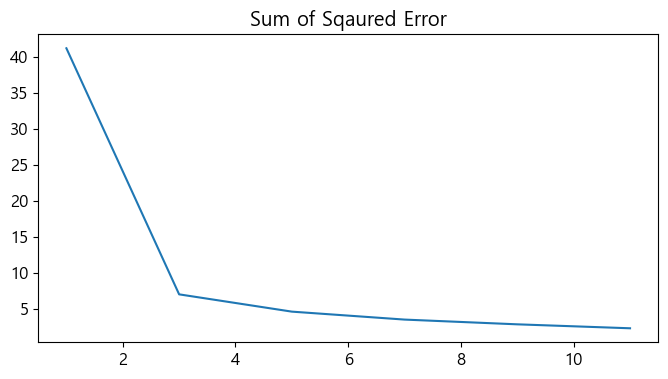

In [40]:
plt.plot(range(1,12,2), sse_per_n)
plt.title("Sum of Sqaured Error")